In [10]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "whitegrid")

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML, Javascript
import IPython.display


In [82]:
import os
import json
import pandas as pd

class JSONProcessor:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.data_frame = pd.DataFrame()

    def process_json_files(self):
        files = os.listdir(self.folder_path)

        for file_name in files:
            file_path = os.path.join(self.folder_path, file_name)

            if file_name.endswith('.json'):
                json_data = self.load_json(file_path)
                self.process_data(json_data)

    def load_json(self, file_path):
        try:
            with open(file_path, 'r') as json_file:
                return json.load(json_file)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON in file {file_path}: {e}")
            return None
        
    def process_data(self, json_data):
        # Customize this method based on your needs
        # For demonstration, appending the JSON data to a Pandas DataFrame
        self.data_frame = self.data_frame.append(json_data, ignore_index=True)

    def get_data_frame(self):
        return self.data_frame

In [83]:
folder_path = '/Users/keshav/Desktop/New Job 2022 Docs/Adobe /data/tmdb'
json_processor = JSONProcessor(folder_path)
json_processor.process_json_files()
df_json = json_processor.get_data_frame()


Error decoding JSON in file /Users/keshav/Desktop/New Job 2022 Docs/Adobe /data/tmdb/862.0.json: Expecting value: line 1 column 1 (char 0)


In [96]:
df_json.head(3)

,overview,popularity,original_title,runtime,release_date,vote_average,vote_count,status,tagline,spoken_languages,cast,id
0,"The second ""visual album"" (a collection of sho...",8.738,Lemonade,65,2016-04-23,8.497,147,Released,,en,Beyoncé|Jay-Z|Serena Williams|Zendaya|Quvenzha...,394269
1,"Set in 1929, a political boss and his advisor ...",17.518,Miller's Crossing,115,1990-09-21,7.455,1496,Released,"Up is down, black is white, and nothing is wha...",en|ga|it|yi,Gabriel Byrne|Albert Finney|Jon Polito|Marcia ...,379
2,A student's premonition of a deadly rollercoas...,40.900,Final Destination 3,93,2006-02-09,6.081,3549,Released,This ride will be the death of you.,en,Mary Elizabeth Winstead|Ryan Merriman|Kris Lem...,9286


In [4]:
df_rating = pd.read_csv('ratings.csv')
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

In [101]:
df_rating.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [126]:
df_rating['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

In [102]:
df_movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [116]:
df_tags.head(1)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994


In [104]:
df_links.head(1)

,movieId,imdbId,tmdbId
0,1,114709,862.0


In [136]:
data_rat_mov = pd.merge(df_rating, df_movies, on='movieId')
data_rat_mov_tag = pd.merge(data_rat_mov, df_tags, on='movieId')
movie_data = pd.merge(data_rat_mov_tag, df_links, on='movieId')
movie_data.head(3)

,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,114709,862.0
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825,114709,862.0
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013,114709,862.0


In [122]:
def create_user_movie_matrix(df):
    user_movie_matrix = movie_data.pivot_table(index='userId_x', columns='movieId', values='rating', fill_value=0)
    return user_movie_matrix

# Example usage:
# Assuming 'df' is your DataFrame
user_movie_matrix = create_user_movie_matrix(df_rating)

# Display the user-movie matrix
user_movie_matrix

movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
userId_x,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,2.5,2.5,0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,3.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0,4.5,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [70]:
# Analyze distribution of ratings
rating_distribution = movie_data['rating'].value_counts()

4.0    64781
5.0    63845
4.5    31502
3.0    28550
3.5    22895
2.0     7955
2.5     6488
1.0     3721
0.5     1908
1.5     1568
Name: rating, dtype: int64
title
(500) Days of Summer (2009)          336
...And Justice for All (1979)          3
10 Cloverfield Lane (2016)            28
10 Things I Hate About You (1999)     54
101 Dalmatians (1996)                 94
                                    ... 
Zero Dark Thirty (2012)               70
Zombieland (2009)                    318
Zoolander (2001)                     324
Zulu (1964)                            4
eXistenZ (1999)                       22
Name: userId_x, Length: 1554, dtype: int64


In [72]:
# Analyze distribution of movie rentals
movie_rentals = movie_data.groupby('title')['userId_x'].count()
movie_rentals

title
(500) Days of Summer (2009)          336
...And Justice for All (1979)          3
10 Cloverfield Lane (2016)            28
10 Things I Hate About You (1999)     54
101 Dalmatians (1996)                 94
                                    ... 
Zero Dark Thirty (2012)               70
Zombieland (2009)                    318
Zoolander (2001)                     324
Zulu (1964)                            4
eXistenZ (1999)                       22
Name: userId_x, Length: 1554, dtype: int64

In [73]:
# Analyze genres
genres_analysis = movie_data.groupby('genres')['userId_x'].count()
genres_analysis

genres
(no genres listed)                                       3
Action|Adventure                                      1893
Action|Adventure|Animation|Children|Comedy             500
Action|Adventure|Animation|Children|Comedy|Fantasy     217
Action|Adventure|Animation|Children|Comedy|Sci-Fi       11
                                                      ... 
Sci-Fi                                                 326
Sci-Fi|IMAX                                            730
Sci-Fi|Thriller                                         23
Thriller                                               420
Western                                                302
Name: userId_x, Length: 370, dtype: int64

In [75]:

# Analyze tags
tags_analysis = movie_data.groupby('tag')['userId_y'].count()
tags_analysis

tag
"artsy"                                        3
06 Oscar Nominated Best Movie - Animation    114
1900s                                         10
1920s                                         40
1950s                                         28
                                            ... 
wry                                           12
younger men                                   12
zither                                        24
zoe kazan                                      3
zombies                                      250
Name: userId_y, Length: 1584, dtype: int64

In [77]:
# Analyze timestamp trends
timestamp_trends = movie_data.groupby('timestamp_x')['userId_x'].count()
timestamp_trends

timestamp_x
828124615     14
828124616     17
829322340     16
829759809     31
829760897     46
              ..
1537470612     3
1537632280     5
1537649775     2
1537674946     2
1537799250     1
Name: userId_x, Length: 42210, dtype: int64

In [78]:
# Correlation matrix
correlation_matrix = movie_data[['rating', 'userId_x', 'timestamp_x']].corr()
correlation_matrix

,rating,userId_x,timestamp_x
rating,1.000000,0.047780,-0.009884
userId_x,0.047780,1.000000,0.058578
timestamp_x,-0.009884,0.058578,1.000000


<AxesSubplot:>

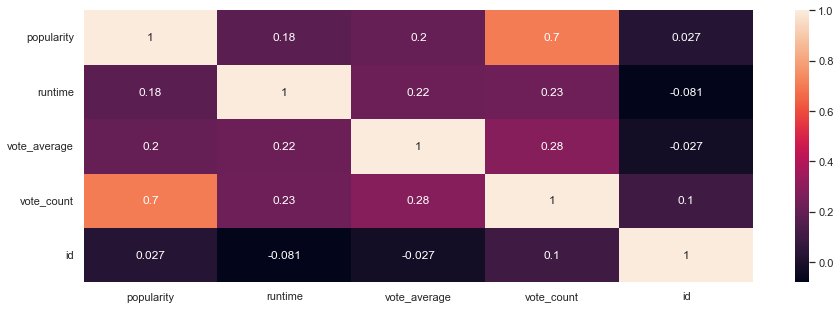

In [135]:
plt.figure(figsize = (15,5))
sns.heatmap(df_json.corr(), annot=True)

In [80]:
# Explore user behavior
user_behavior = movie_data.groupby('userId_x')['rating'].mean()
user_behavior

userId_x
1      4.040472
2      4.020979
3      0.500000
4      2.708621
5      4.517986
         ...   
606    4.109808
607    3.533333
608    3.805837
609    3.817427
610    4.310994
Name: rating, Length: 610, dtype: float64

In [137]:
movie_data.groupby('title')['rating'].mean().head()


title
(500) Days of Summer (2009)          3.666667
...And Justice for All (1979)        3.166667
10 Cloverfield Lane (2016)           3.678571
10 Things I Hate About You (1999)    3.527778
101 Dalmatians (1996)                3.074468
Name: rating, dtype: float64

In [138]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
Come and See (Idi i smotri) (1985)     5.0
Lady Jane (1986)                       5.0
Woman Under the Influence, A (1974)    5.0
Into the Woods (1991)                  5.0
Two Family House (2000)                5.0
Name: rating, dtype: float64

In [139]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()


title
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Name: rating, dtype: int64

In [140]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())


In [141]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [142]:
ratings_mean_count.head()

,rating,rating_counts
title,,
(500) Days of Summer (2009),3.666667,336
...And Justice for All (1979),3.166667,3
10 Cloverfield Lane (2016),3.678571,28
10 Things I Hate About You (1999),3.527778,54
101 Dalmatians (1996),3.074468,94


<AxesSubplot:>

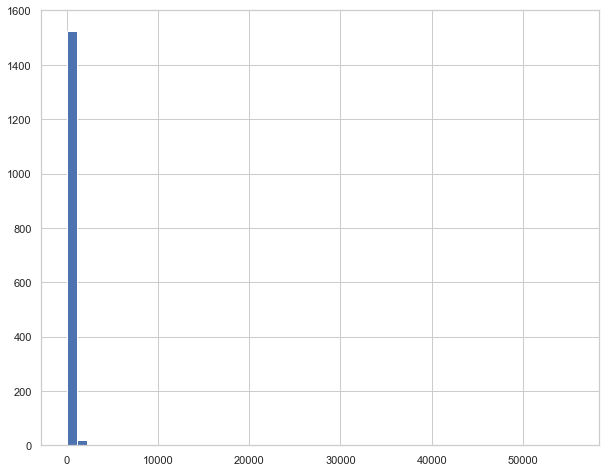

In [143]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

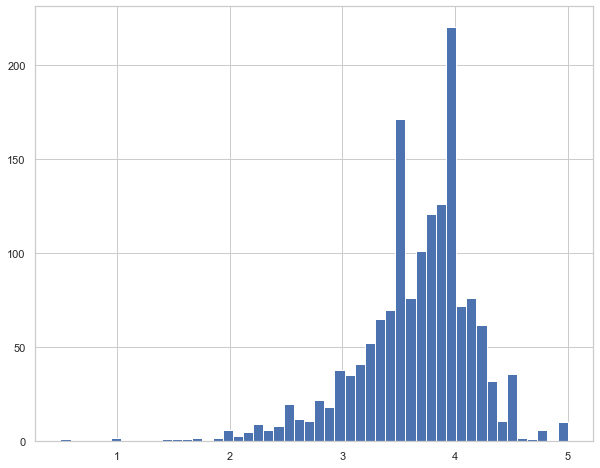

In [144]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 720x576 with 0 Axes>

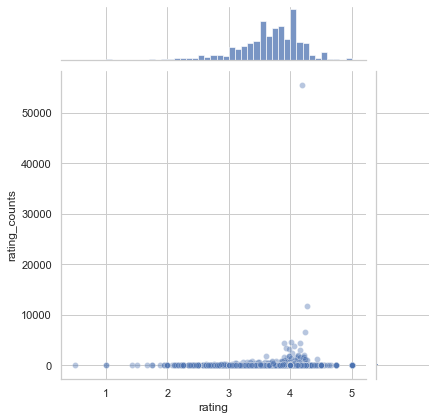

In [145]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [44]:
import pandas as pd

def create_user_movie_matrix(df):
    # Use pivot_table to create the user-movie matrix
    user_movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
    return user_movie_matrix

# Example usage:
# Assuming 'df' is your DataFrame
user_movie_matrix = create_user_movie_matrix(df_rating)

# Display the user-movie matrix
(user_movie_matrix)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0,4.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


In [149]:
user_movie_rating = movie_data.pivot_table(index='userId_x', columns='title', values='rating')

user_movie_rating

title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
userId_x,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.5


In [5]:
df_movie_rating =pd.merge(df_rating, df_movies, on='movieId')
df_movie_rating.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
# Break up the big genre string into a string array
df_movie_rating['genres'] = df_movie_rating['genres'].str.split('|')
# Convert genres to string value
df_movie_rating['genres'] = df_movie_rating['genres'].fillna("").astype('str')

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_movie_rating['genres'])
tfidf_matrix.shape

(100836, 177)

In [9]:
tfidf_matrix

<100836x177 sparse matrix of type '<class 'numpy.float64'>'
	with 484444 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]